In [ ]:
path_hcp = "/content/drive/MyDrive/udacity/HCP.csv"

Problems to solve
- Date ranges
- Multiple stocks
- Align dates
- Proper date order

How many days were US stocks traded at NYSE in 2014? 
- 252

S&P 500 is a stock market index based on 500 large American companies listed on the NYSE or NASDAQ. Think of it as a weighted mean of the stock prices of the companies, where the number of shares are used as weights (with some adjustment for any events that may affect apparent stock value, such as splits).

SPDR® S&P 500 is an ETF (or exchange-traded fund) that tracks the S&P 500 index, and is itself listed on NYSE under the ticker symbol "SPY".

# JOIN
- df1: all available dates
- df2: missing weekend
- Set 'Dates' as index

In [7]:
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [66]:
"""Utility functions"""

def get_max_close(symbol):
  df = pd.read_csv("/content/drive/Mydrive/udacity/HCP.csv")
  return df['Close'].max()


#---------- Read Data ------------------------------

def symbol_to_path(symbol, base_dir="/content/drive/MyDrive/udacity/"):
  """Return CSV file path given ticker symbol."""
  return os.path.join(base_dir, "{}.csv".format(str(symbol)))



def get_data(symbols, dates):
  """Read stock data (adjusted close) for given symbols from CSV files."""
  df = pd.DataFrame(index=dates)
  if 'SPY' not in symbols:  # add SPY for reference, if absent
      symbols.insert(0, 'SPY')

  for symbol in symbols:
      df_temp = pd.read_csv(symbol_to_path(symbol), index_col='Date',
                            parse_dates=True, usecols=['Date', 'Adj Close'], 
                            na_values=['nan'])
      df_temp = df_temp.rename(columns={'Adj Close': symbol})
      df = df.join(df_temp)
      if symbol == 'SPY':  # drop dates SPY did not trade
          df = df.dropna(subset=["SPY"])

  return df



def normalize_data(df):
  """Normalize stock prices using the first row of the dataframe."""
  return df / df.iloc[0,:]



def get_max_index(a):
  """Return the index of the maximum value in given 1D array."""
  # TODO: Your code here
  index = np.argmax(a)
  return index


#---------- Bollinger Bands ------------------------------

def get_rolling_mean(df, window):
    """Return rolling mean of given values, using specified window size."""
    rm = df.rolling(window=window).mean()
    #rm.iloc[0,:] = 0
    return rm
    #return pd.rolling_mean(values, window=window)


def get_rolling_std(df, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    rstd = df.rolling(window=window).std()
    #rstd.iloc[0,:] = 0
    return rstd
    #return pd.rolling_std(values, window=window)


def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm + 2 * rstd
    lower_band = rm - 2 * rstd
    return upper_band, lower_band


#---------- Data Plot -----------------------------------

def plot_data(df, title="Stock prices"):
  """Plot stock prices"""
  ax = df.plot(title=title, fontsize=2)
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")
  plt.show()



def plot_selected(df, columns, start_index, end_index):
  """Plot the desired columns over index values in the given range."""
  # TODO: Your code here
  # Note: DO NOT modify anything else!
  df_plot = df.loc[start_index:end_index, columns]
  plot_data(df_plot)

# Numpy practice

In [ ]:
def get_max_index(a):
    """Return the index of the maximum value in given 1D array."""
    # TODO: Your code here
    index = np.argmax(a)
    return index


def test_run():
    a = np.array([9, 6, 2, 3, 12, 14, 7, 10], dtype=np.int32)  # 32-bit integer array
    print("Array:", a)
    
    # Find the maximum and its index in array
    print("Maximum value:", a.max())
    print("Index of max.:", get_max_index(a))


if __name__ == "__main__":
    test_run()

Array: [ 9  6  2  3 12 14  7 10]
Maximum value: 14
Index of max.: 5


In [60]:
def_dates = pd.date_range('2021-09-01', '2022-07-31')

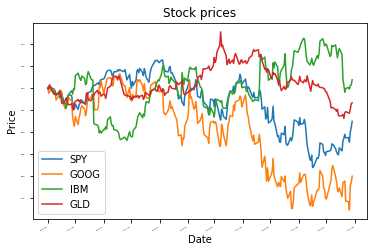

                 SPY      GOOG       IBM       GLD
2021-09-01  1.000000  1.000000  1.000000  1.000000
2021-09-02  1.003077  0.988872  1.005097  0.997348
2021-09-03  1.002833  0.992684  1.002010  1.008014
2021-09-07  0.999248  0.997785  0.991098  0.988273
2021-09-08  0.998030  0.993428  0.995477  0.985798
...              ...       ...       ...       ...
2022-07-25  0.887991  0.741967  1.001872  0.944196
2022-07-26  0.877485  0.722974  0.998287  0.943076
2022-07-27  0.900270  0.778925  1.006393  0.952681
2022-07-28  0.911562  0.785713  1.007172  0.964290
2022-07-29  0.924851  0.799770  1.019409  0.967001

[229 rows x 4 columns]


In [61]:
"""Normalized Stock Prices Chart."""

def test_run():
  # Define a date range
  dates = def_dates

  # Choose stock symbols to read
  symbols = ['GOOG', 'IBM', 'GLD']
  
  # Get stock data
  df = get_data(symbols, dates)
  df = normalize_data(df)
  plot_data(df)
  print(df)

if __name__ == "__main__":
    test_run()


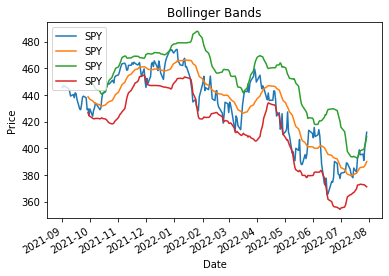

In [65]:
"""Bollinger Bands."""

def test_run():
    # Read data
    dates = def_dates
    symbols = ['SPY']
    df = get_data(symbols, dates)

    # Compute Bollinger Bands
    # 1. Compute rolling mean
    rm_SPY = get_rolling_mean(df, window=20)

    # 2. Compute rolling standard deviation
    rstd_SPY = get_rolling_std(df, window=20)

    # 3. Compute upper and lower bands
    upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    
    # Plot raw SPY values, rolling mean and Bollinger Bands
    ax = df.plot(title="Bollinger Bands", label='SPY')
    rm_SPY.plot(label='Rolling mean', ax=ax)
    upper_band.plot(label='upper band', ax=ax)
    lower_band.plot(label='lower band', ax=ax)

    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')
    plt.show()


if __name__ == "__main__":
    test_run()


Daily Returns

daily_ret[t] = price[t] / price[t-1] - 1

In [58]:
# Read data
dates = def_dates
symbols = ['SPY']
df = get_data(symbols, dates)

# Compute Bollinger Bands
# 1. Compute rolling mean
rm_SPY = get_rolling_mean(df, window=3)

# 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df, window=3)

# 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)

In [57]:
rm_SPY

,SPY
2021-08-20,0.0
2021-08-23,NaN
2021-08-24,NaN
2021-08-25,NaN
2021-08-26,NaN
2021-08-27,NaN
2021-08-30,NaN
2021-08-31,NaN


In [10]:
temp = df.to_numpy()

In [11]:
temp

array([[1, 2, 3],
       [4, 5, 6]])

In [13]:
temp[:,:-1]

array([[1, 2],
       [4, 5]])

In [14]:
df

,0,1,2
0,1,2,3
1,4,5,6


In [18]:
df.shift(1)

,0,1,2
0,NaN,NaN,NaN
1,1.0,2.0,3.0
2,4.0,5.0,6.0


In [19]:
df / df.shift(1)

,0,1,2
0,NaN,NaN,NaN
1,4.00,2.5,2.0
2,1.75,1.6,1.5


In [20]:
def comupte_daily_return(df):
  """Compute and return the daily return values."""
  daily_returns = df.copy()
  daily_returns[1:] = (df[1:] / df[:-1].values) - 1
  daily_returns.iloc[0, :] = 0
  return daily_returns

# Fill Forward first then Fill Backward

In [ ]:
daily_returns = compute_daily_returns(df)

daily_returns.hist(bins=20)
mean = daily_returns['SPY'].mean()
print("mean=", mean)
std = daily_returns['SPY'].std()
print("std=", std)

plt.axvline(mean, color='w', linestyle='dashed', linewidth=2)
plt.axvline(std, color='r', linestyle='dashed', linewidth=2)
plt.axvline(-std, color='r', linestyle='dashed', linewidth=2)

print("kurtosis=", daily_returns.kurtosis())

# Compare two histograms

In [ ]:
daily_returns['SPY'].hist(bins=20, label='SPY')
daily_returns['XOM'].hist(bins=20, label='XOM')
plt.legend(loc='upper right')
plt.show()

# Daily Returns Scatter Plots

slope -> beta<br>
y-axis intersect -> alpha<br>
slope != correlation